In [4]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_recall_curve

In [7]:
data = datasets.load_iris()
df = pd.DataFrame(data.data, columns = data.feature_names)
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(data.data, data.target, test_size = 0.4, random_state = 0)
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
Y_pred_probability = model.predict_proba(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.85      0.96      0.90        23
           2       0.94      0.81      0.87        21

    accuracy                           0.92        60
   macro avg       0.93      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



In [10]:
model.coef_

array([[-0.44744323,  0.66852964, -2.14742464, -0.93048837],
       [ 0.34094558, -0.60676942, -0.09795659, -0.6335666 ],
       [ 0.10649765, -0.06176022,  2.24538124,  1.56405497]])

In [11]:
model.intercept_

array([  9.30654654,   3.05962179, -12.36616832])

In [12]:
Y_pred_probability

array([[3.29825430e-04, 1.22805343e-01, 8.76864832e-01],
       [1.49261191e-02, 9.68411189e-01, 1.66626920e-02],
       [9.87110645e-01, 1.28890666e-02, 2.88839779e-07],
       [3.88052369e-06, 4.06203439e-02, 9.59375776e-01],
       [9.70897321e-01, 2.91020794e-02, 5.99354210e-07],
       [6.07111037e-06, 1.15459742e-02, 9.88447955e-01],
       [9.82279008e-01, 1.77206914e-02, 3.00477117e-07],
       [4.17764768e-03, 7.27405437e-01, 2.68416915e-01],
       [2.31301535e-03, 7.61256930e-01, 2.36430055e-01],
       [2.61003455e-02, 9.31902944e-01, 4.19967105e-02],
       [2.52670782e-04, 3.18465164e-01, 6.81282165e-01],
       [9.77397249e-03, 7.84870316e-01, 2.05355711e-01],
       [5.75872163e-03, 8.37927086e-01, 1.56314192e-01],
       [4.44887933e-03, 7.90252929e-01, 2.05298192e-01],
       [5.60299177e-03, 7.61561343e-01, 2.32835665e-01],
       [9.83307032e-01, 1.66927192e-02, 2.49227584e-07],
       [9.27256800e-03, 7.96390845e-01, 1.94336587e-01],
       [1.42245600e-02, 8.99979

In [16]:
precision_0, recall_0, _ = precision_recall_curve(Y_test==0, Y_pred_probability[:,0])
precision_1, recall_1, _ = precision_recall_curve(Y_test==1, Y_pred_probability[:,1])
precision_2, recall_2, _ = precision_recall_curve(Y_test==2, Y_pred_probability[:,2])

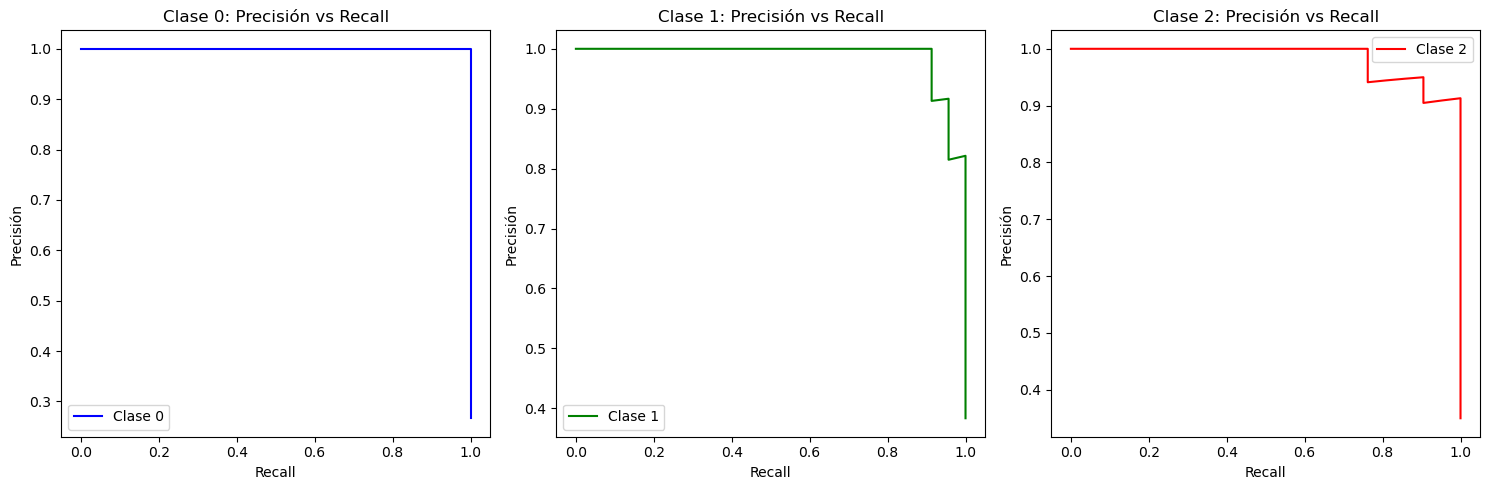

In [17]:
# Crear la figura y los subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Subplot para la clase 0
axes[0].plot(recall_0, precision_0, color='blue', label='Clase 0')
axes[0].set_title('Clase 0: Precisión vs Recall')
axes[0].set_xlabel('Recall')
axes[0].set_ylabel('Precisión')
axes[0].legend()

# Subplot para la clase 1
axes[1].plot(recall_1, precision_1, color='green', label='Clase 1')
axes[1].set_title('Clase 1: Precisión vs Recall')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precisión')
axes[1].legend()

# Subplot para la clase 2
axes[2].plot(recall_2, precision_2, color='red', label='Clase 2')
axes[2].set_title('Clase 2: Precisión vs Recall')
axes[2].set_xlabel('Recall')
axes[2].set_ylabel('Precisión')
axes[2].legend()

# Ajustar el espacio entre los subplots
plt.tight_layout()
plt.show()